In [6]:
import numpy as np
import glob
import os

import matplotlib.pyplot as plt

from scripts_fermions.operators import Hamiltonian, Boost, measure_local_observables, t_to_L
import yastn
from yastn.tn import mps

In [2]:
g = 1
N = 256
a = 0.125
sg2 = 0.25
x0 = 1.5
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/state_t=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fns = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", "dt=0.0625", f"{N=}", f"{a=:0.4f}", f"{x0=:0.4f}", f"{sg2=:0.4f}"])]);#

def fn_mass(fns, **kwargs):
    return [x for x in fns if all( f"{k}={v}" in x for k, v in kwargs.items())][0]

In [3]:
ts = np.linspace(0, 16, 17)
Ps = [0, 1, 2, 4, 6]
Ds = [256, 512]
ms = [0, 0.5]
psi_t = {(m, P, t, D): yastn.from_dict(np.load(fn_mass(fns, P=P, t=t, D=D, m=m), allow_pickle=True).item()['psi']) for t in ts for D in Ds for m in ms for P in Ps}

In [4]:
SV_t = {k: v.get_Schmidt_values() for k, v in psi_t.items()}

In [7]:
dist_Ln = {}
for k, SV in SV_t.items():
    dist_Ln[k] = {n: {t_to_L(tt, n, N): np.sum(ten[tt + tt] ** 2) for tt in ten.get_legs(axes=0).t} for n, ten in enumerate(SV, start=-1)}

In [8]:
LLs = [-2, -1, 0, 1, 2]
dist_Ln_plot = {k: {l: np.zeros(N+1) for l in LLs} for k, v in dist_Ln.items()}

for k, v in dist_Ln.items():
    for l in LLs:
        for n, pl in v.items():
            if l in pl:
                dist_Ln_plot[k][l][n+1] = pl[l]


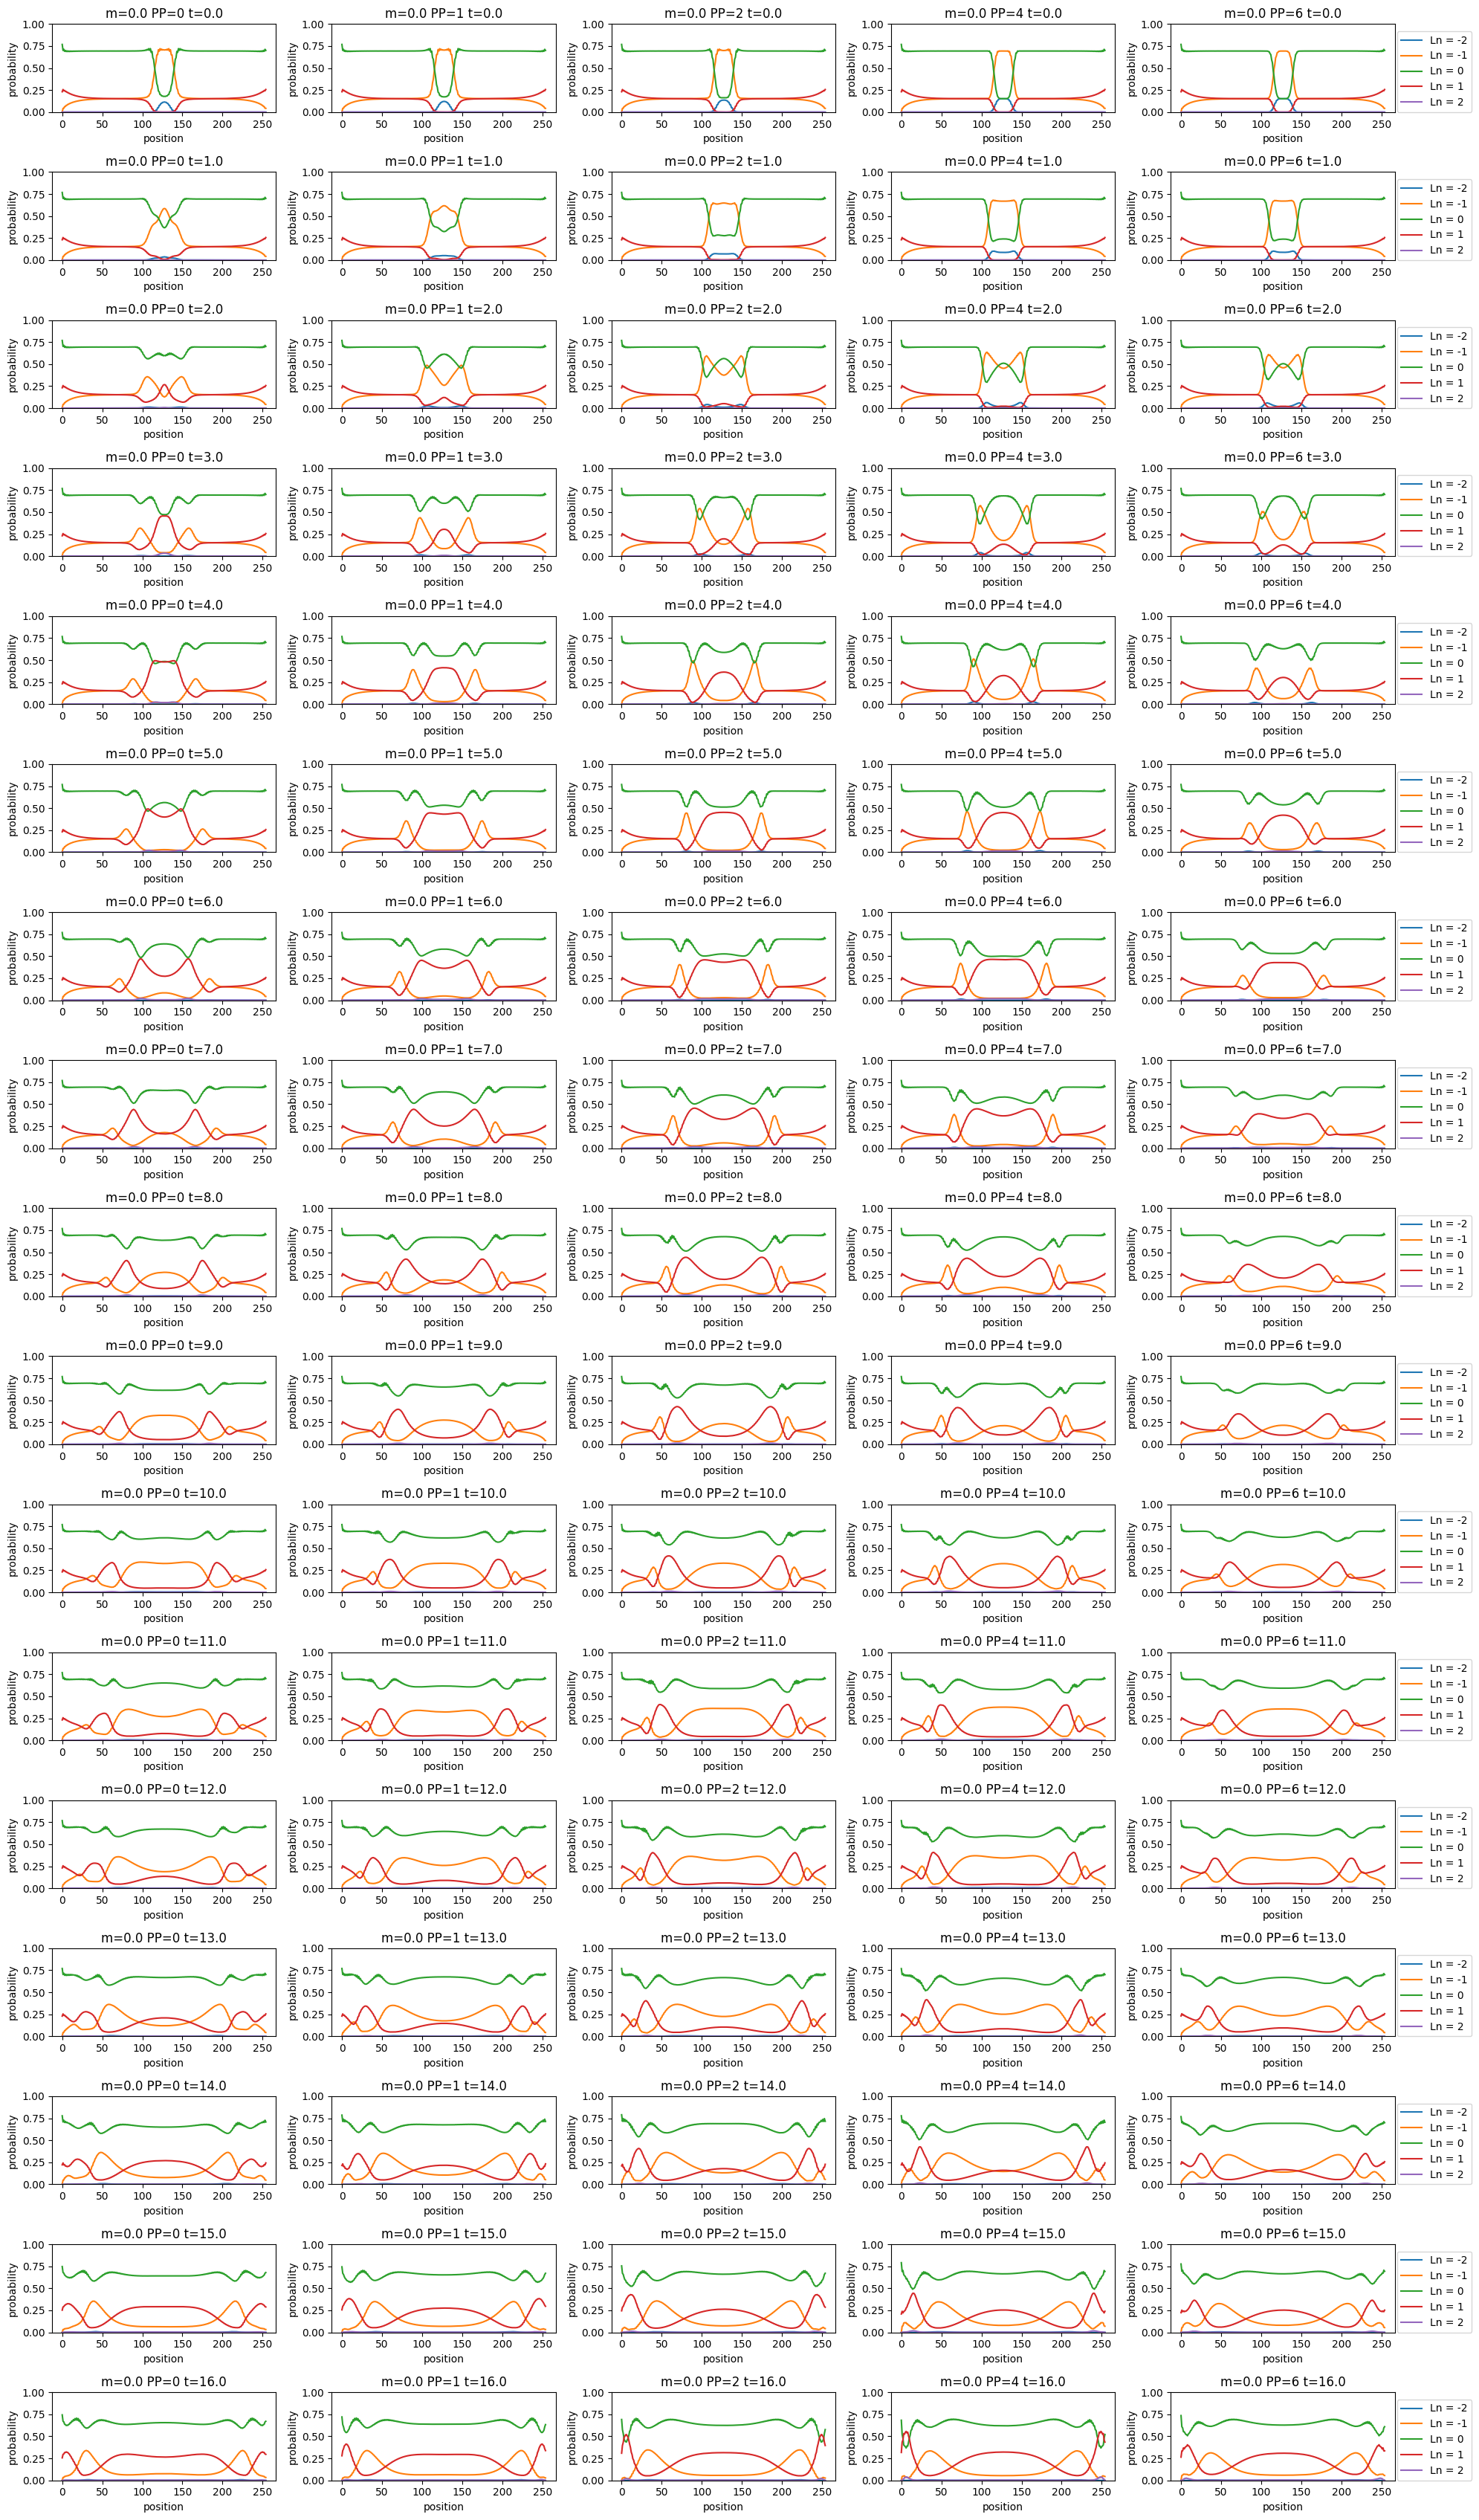

In [10]:
m = 0
fig, ax = plt.subplots(len(ts),len(Ps))
fig.set_size_inches(4 * len(Ps), 2*len(ts))
for ii, t in enumerate(ts):
    for jj, PP in enumerate(Ps):
        for l, pl in dist_Ln_plot[m, PP, t, 512].items():
            ax[ii, jj].plot( (pl[0:-2] + pl[1:-1]) / 2, label=f'Ln = {l}')
        ax[ii, jj].set_title(f"{m=:0.1f} {PP=} {t=:0.1f}")
        ax[ii, jj].set_ylim([0, 1])
        ax[ii, jj].set_ylabel('probability')
        ax[ii, jj].set_xlabel('position')
    ax[ii, jj].legend(loc=(1.01, 0))
fig.tight_layout()


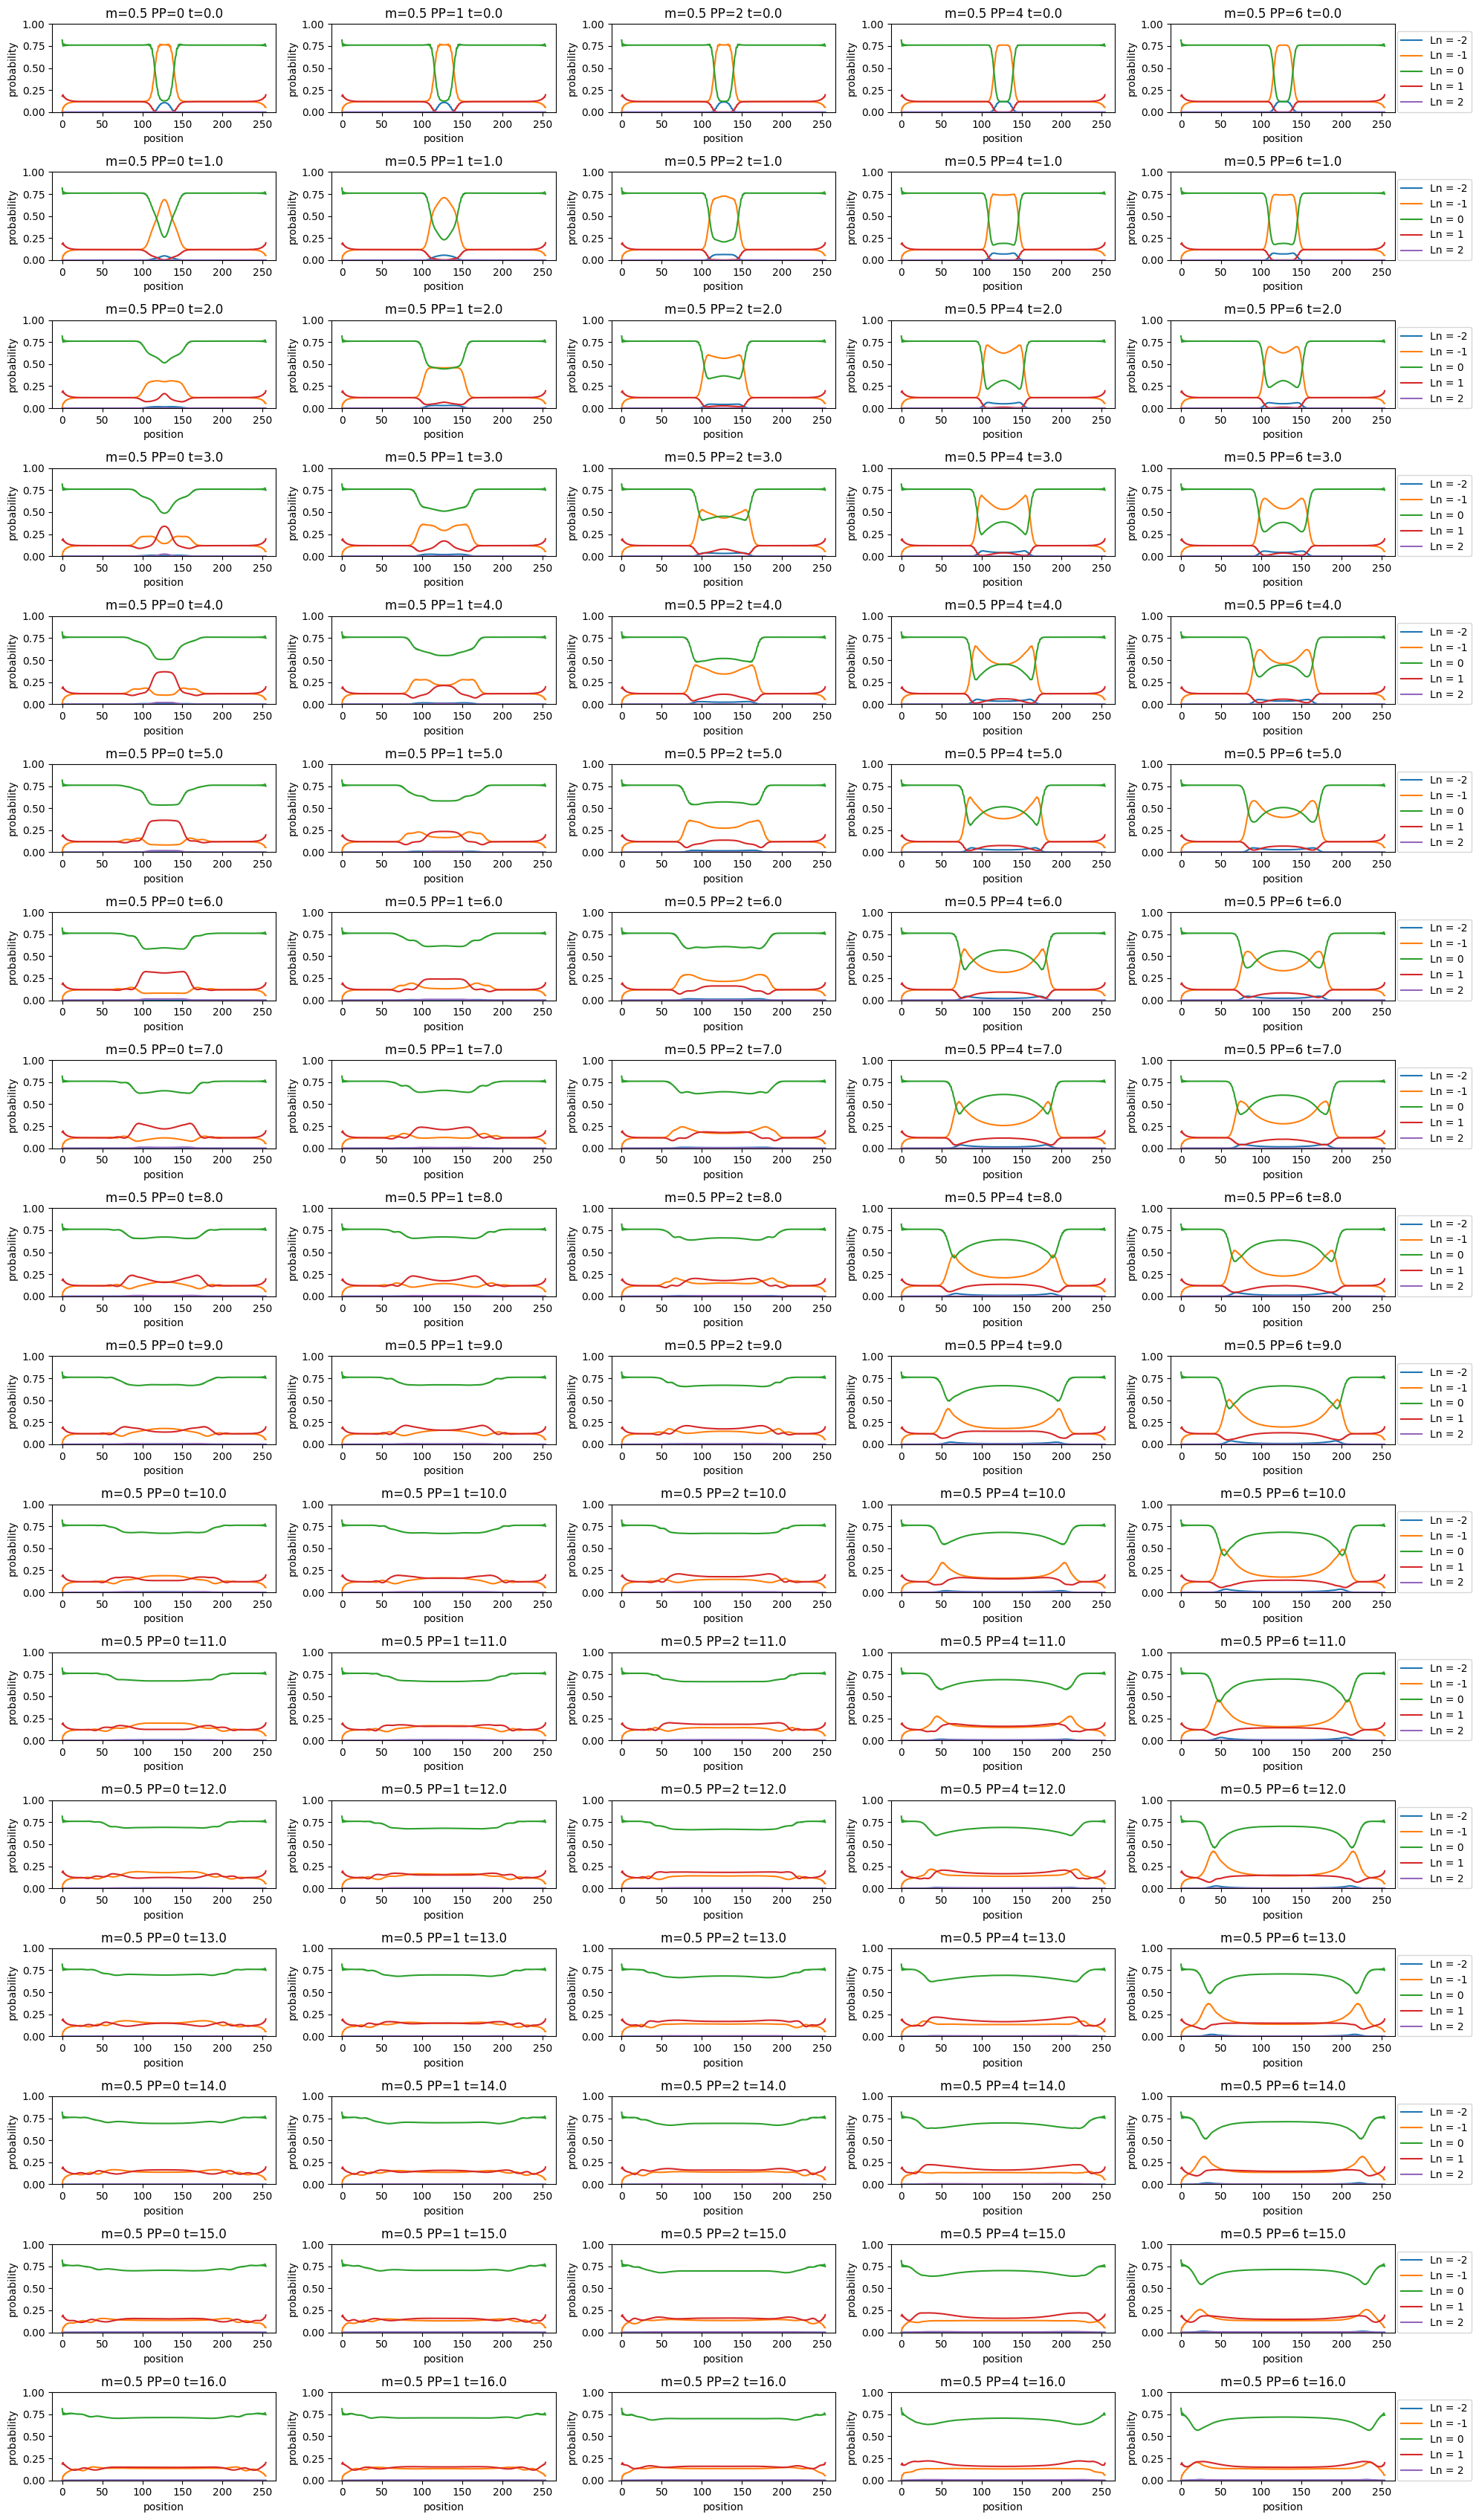

In [11]:
m = 0.5
fig, ax = plt.subplots(len(ts),len(Ps))
fig.set_size_inches(4 * len(Ps), 2*len(ts))
for ii, t in enumerate(ts):
    for jj, PP in enumerate(Ps):
        for l, pl in dist_Ln_plot[m, PP, t, 512].items():
            ax[ii, jj].plot( (pl[0:-2] + pl[1:-1]) / 2, label=f'Ln = {l}')
        ax[ii, jj].set_title(f"{m=:0.1f} {PP=} {t=:0.1f}")
        ax[ii, jj].set_ylim([0, 1])
        ax[ii, jj].set_ylabel('probability')
        ax[ii, jj].set_xlabel('position')
    ax[ii, jj].legend(loc=(1.01, 0))
fig.tight_layout()